In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score



In [ ]:
df = pd.read_csv("sur2.2.csv")

In [ ]:
df

,Unnamed: 0,date,O3,RH,SR,TOUT,WSR,MONTH,HORA,O3P,CALIDAD
0,8,1.641042e+09,13,56,0.001,16.48,4.4,1,7,17.625,Buena
1,9,1.641046e+09,5,54,0.009,16.29,3.7,1,8,15.625,Buena
2,10,1.641049e+09,10,50,0.086,17.93,5.3,1,9,13.500,Buena
3,11,1.641053e+09,17,36,0.292,23.59,4.3,1,10,12.625,Buena
4,12,1.641056e+09,22,25,0.417,29.51,5.0,1,11,13.500,Buena
...,...,...,...,...,...,...,...,...,...,...,...
13671,14250,1.692317e+09,39,20,0.050,36.81,12.4,8,18,41.750,Buena
13672,14251,1.692320e+09,38,22,0.002,35.75,12.0,8,19,40.625,Buena
13673,14252,1.692324e+09,36,22,0.000,35.23,11.0,8,20,39.375,Buena
13674,14253,1.692328e+09,32,26,0.001,34.43,12.4,8,21,38.125,Buena


In [ ]:
X = df[["RH","SR","TOUT","WSR","HORA","MONTH"]]

# regresion

In [ ]:
import scipy

In [ ]:
ya = df["O3"]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=4,include_bias=False)
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(13676, 209)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, ya, test_size=0.3, random_state=0) # 70% training and 30% test

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
r = r2_score(y_test,test_predictions)
r

0.5396236325143934

In [ ]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,16):

    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, ya, test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later


    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

KeyboardInterrupt: ignored

In [ ]:
plt.plot(range(1,9),train_rmse_errors[:8],label='TRAIN')
plt.plot(range(1,9),test_rmse_errors[:8],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, ya, test_size=0.3, random_state=0)

In [ ]:
# Based on our chart, could have also been degree=4, but
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=4,include_bias=False)
final_model = LinearRegression()
A=final_model.fit(final_poly_converter.fit_transform(X_train),y_train)



In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_predictions = final_model.predict(final_poly_converter.fit_transform(X_train))
MAE = mean_absolute_error(y_train,test_predictions)
MSE = mean_squared_error(y_train,test_predictions)
RMSE = np.sqrt(MSE)
r = r2_score(y_train,test_predictions)

r

0.7494905885565142

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_predictions = final_model.predict(final_poly_converter.fit_transform(X_test))
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
r = r2_score(y_test,test_predictions)
residual = (y_test - test_predictions)
residual.to_csv("rsur2.csv")
r

0.7346647456163171

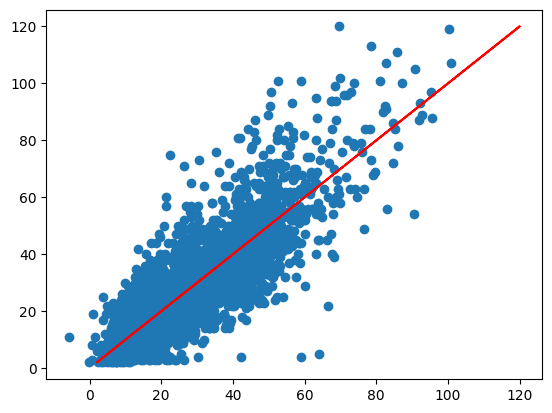

In [ ]:
plt.scatter(test_predictions,y_test)
plt.plot(y_test, y_test,color='red')

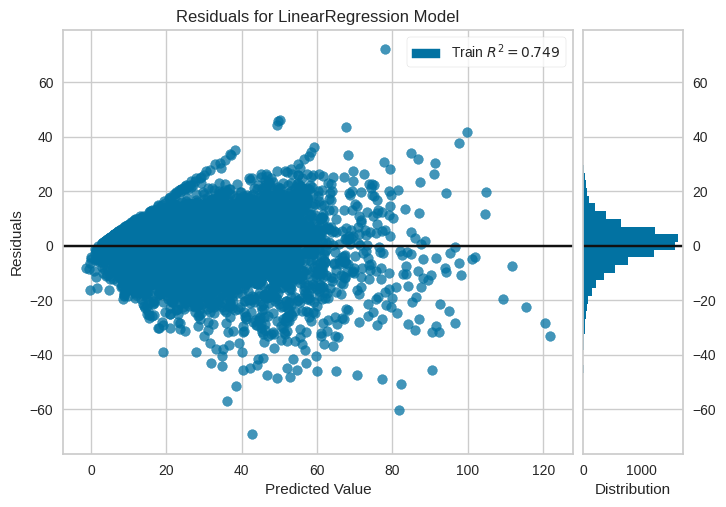

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer_residuals = ResidualsPlot(A)
visualizer_residuals.fit(final_poly_converter.fit_transform(X_train), y_train)
visualizer_residuals.show()

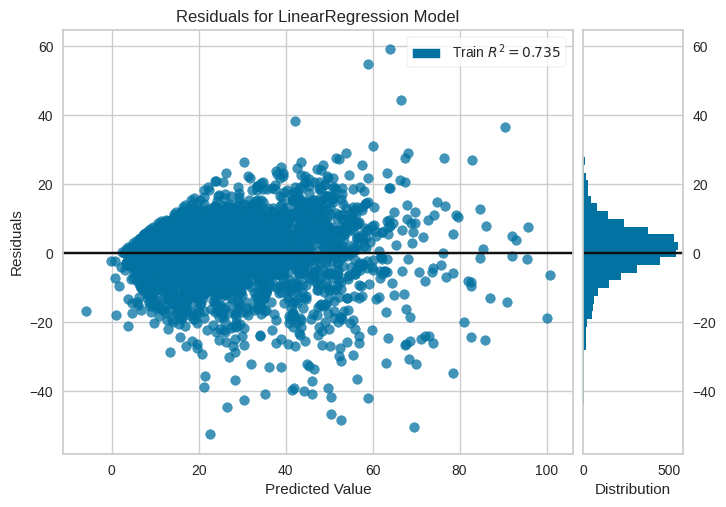

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer_residuals = ResidualsPlot(A)
visualizer_residuals.fit(final_poly_converter.fit_transform(X_test), y_test)
visualizer_residuals.show()

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
mask = yhat != -1
y_train2 = y_train[mask]
X_train2 = X_train
count = 0
for i in X_train.index:
  if mask[count] == False:
    X_train2=X_train2.drop(labels=i)
  count = count + 1



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
X_train2

,RH,SR,TOUT,WSR,HORA,MONTH
6622,46,0.306,30.31,6.3,15,10
6768,39,0.044,24.21,4.6,17,10
5804,72,0.001,23.28,1.9,2,9
10760,31,0.270,31.14,10.6,14,4
821,28,0.048,17.01,8.2,18,2
...,...,...,...,...,...,...
13123,33,0.538,34.78,15.7,15,7
3264,84,0.003,21.86,5.8,5,5
9845,32,0.017,27.59,15.0,19,3
10799,47,0.001,22.62,10.8,5,4


In [ ]:
final_poly_converter = PolynomialFeatures(degree=4,include_bias=False)
final_model = LinearRegression()
A=final_model.fit(final_poly_converter.fit_transform(X_train2),y_train2)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_predictions = final_model.predict(final_poly_converter.fit_transform(X_train2))
MAE = mean_absolute_error(y_train2,test_predictions)
MSE = mean_squared_error(y_train2,test_predictions)
RMSE = np.sqrt(MSE)
r = r2_score(y_train2,test_predictions)

r

0.7462418751906991

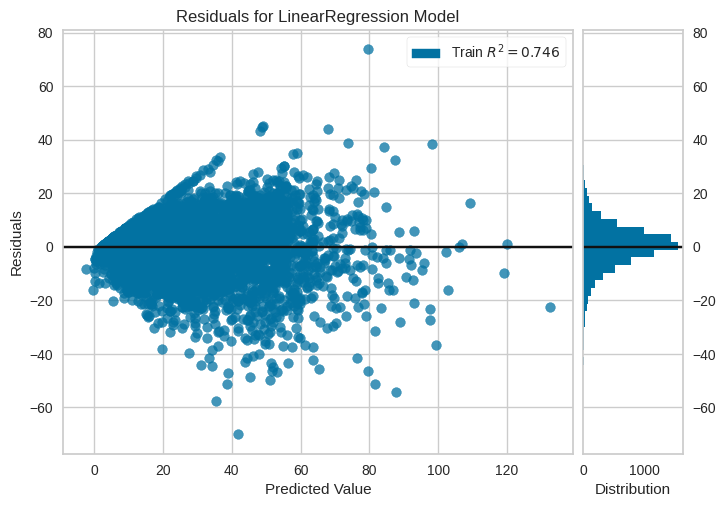

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer_residuals = ResidualsPlot(A)
visualizer_residuals.fit(final_poly_converter.fit_transform(X_train2), y_train2)
visualizer_residuals.show()

##CENTRO

In [ ]:
dc = pd.read_csv("centro2.csv")

In [ ]:
Xc = dc[["RH","SR","TOUT","WSR","HORA","MONTH"]]

In [ ]:
Xc

,RH,SR,TOUT,WSR,HORA,MONTH
0,31,0.000,21.15,5.1,7,1
1,26,0.008,22.53,5.9,8,1
2,27,0.038,23.41,4.2,9,1
3,23,0.122,27.53,4.5,10,1
4,18,0.488,30.19,8.5,11,1
...,...,...,...,...,...,...
13450,19,0.030,36.24,15.1,19,8
13451,21,0.002,35.08,13.2,20,8
13452,22,0.000,34.23,8.7,21,8
13453,25,0.000,33.61,8.8,22,8


In [ ]:
Yc = dc["O3"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xc, Yc, test_size=0.3, random_state=0)

In [ ]:
# Based on our chart, could have also been degree=4, but
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=4,include_bias=False)
final_model = LinearRegression()
A=final_model.fit(final_poly_converter.fit_transform(X_train),y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_predictions = final_model.predict(final_poly_converter.fit_transform(X_train))
MAE = mean_absolute_error(y_train,test_predictions)
MSE = mean_squared_error(y_train,test_predictions)
RMSE = np.sqrt(MSE)
r = r2_score(y_train,test_predictions)

r

0.7846805158505378

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_predictions = final_model.predict(final_poly_converter.fit_transform(X_test))
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
r = r2_score(y_test,test_predictions)
residual2 = (y_test - test_predictions)
residual2.to_csv("rcentro2.csv")
r

0.7671804265038746

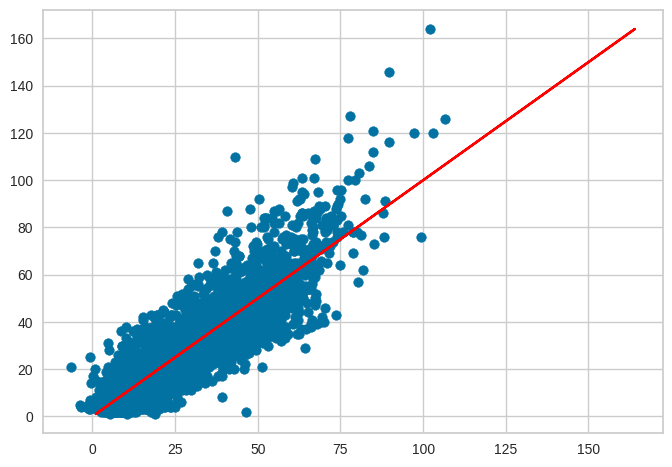

In [ ]:
plt.scatter(test_predictions,y_test)
plt.plot(y_test, y_test,color='red')

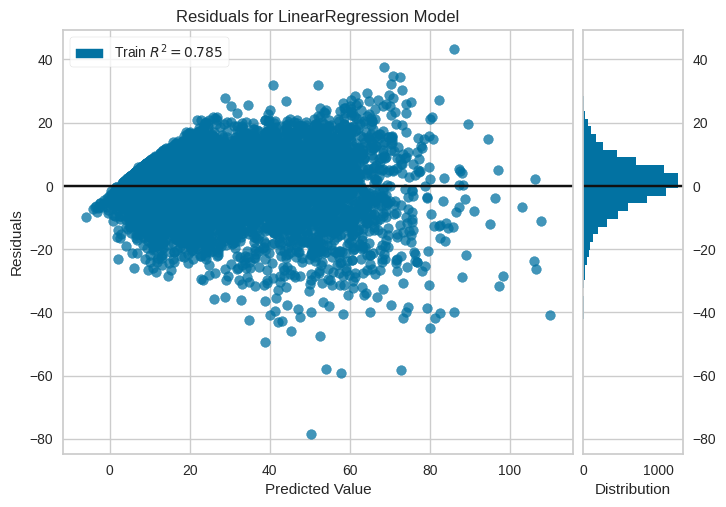

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer_residuals = ResidualsPlot(A)
visualizer_residuals.fit(final_poly_converter.fit_transform(X_train), y_train)
visualizer_residuals.show()

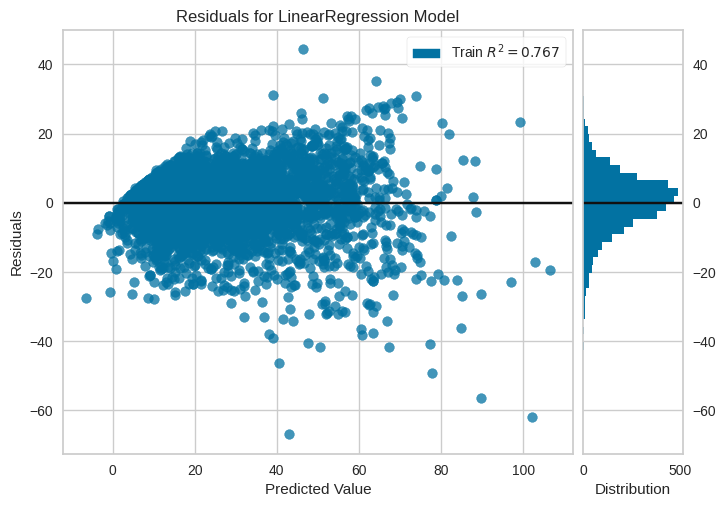

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer_residuals = ResidualsPlot(A)
visualizer_residuals.fit(final_poly_converter.fit_transform(X_test), y_test)
visualizer_residuals.show()

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
mask = yhat != -1
y_train2 = y_train[mask]
X_train2 = X_train
count = 0
for i in X_train.index:
  if mask[count] == False:
    X_train2=X_train2.drop(labels=i)
  count = count + 1



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
X_train2

,RH,SR,TOUT,WSR,HORA,MONTH
1151,54,0.001,21.54,4.3,1,2
12711,64,0.001,25.59,10.9,3,7
10238,58,0.000,26.97,8.5,23,4
1599,30,0.350,19.38,12.9,17,3
768,35,0.001,7.57,10.3,22,2
...,...,...,...,...,...,...
13123,61,0.001,26.55,7.0,3,8
3264,79,0.207,23.23,11.0,14,5
9845,29,0.577,31.88,15.2,16,3
10799,42,0.413,27.46,11.8,13,4


In [ ]:
final_poly_converter = PolynomialFeatures(degree=4,include_bias=False)
final_model = LinearRegression()
A=final_model.fit(final_poly_converter.fit_transform(X_train2),y_train2)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_predictions = final_model.predict(final_poly_converter.fit_transform(X_train2))
MAE = mean_absolute_error(y_train2,test_predictions)
MSE = mean_squared_error(y_train2,test_predictions)
RMSE = np.sqrt(MSE)
r = r2_score(y_train2,test_predictions)

r

0.7893723017332446

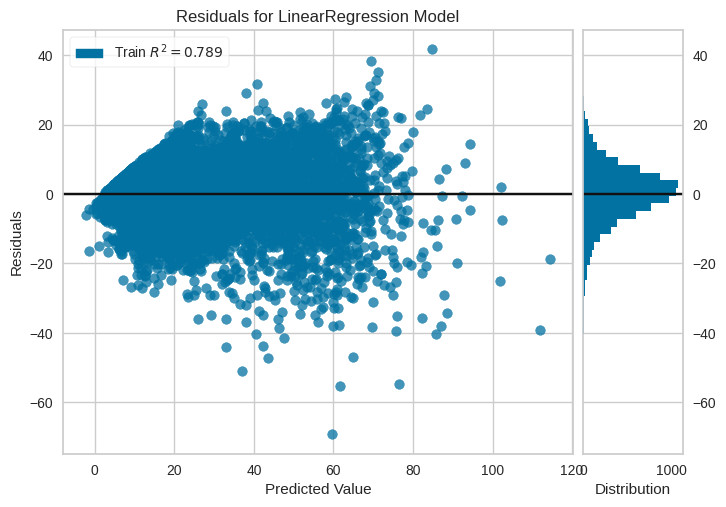

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer_residuals = ResidualsPlot(A)
visualizer_residuals.fit(final_poly_converter.fit_transform(X_train2), y_train2)
visualizer_residuals.show()

## Sureste

In [ ]:
dse = pd.read_csv("sureste3.csv")

In [ ]:
Xse = dse[["RH","SR","TOUT","WSR","HORA","MONTH"]]

In [ ]:
Xse

,RH,SR,TOUT,WSR,HORA,MONTH
0,24,0.0,26.06,7.7,7,1
1,20,0.0,28.36,12.2,8,1
2,21,0.0,28.76,13.7,9,1
3,20,0.0,29.92,15.4,10,1
4,18,0.0,31.82,18.0,11,1
...,...,...,...,...,...,...
10207,63,0.0,28.95,4.2,9,8
10208,56,0.0,30.88,4.7,10,8
10209,52,0.0,32.26,4.3,11,8
10210,44,0.0,34.73,4.1,12,8


In [ ]:
Yse = dse["O3"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xse, Yse, test_size=0.3, random_state=0)

In [ ]:
# Based on our chart, could have also been degree=4, but
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=4,include_bias=False)
final_model = LinearRegression()
A=final_model.fit(final_poly_converter.fit_transform(X_train),y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_predictions = final_model.predict(final_poly_converter.fit_transform(X_train))
MAE = mean_absolute_error(y_train,test_predictions)
MSE = mean_squared_error(y_train,test_predictions)
RMSE = np.sqrt(MSE)
r = r2_score(y_train,test_predictions)

r

0.7757531349117547

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_predictions = final_model.predict(final_poly_converter.fit_transform(X_test))
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
r = r2_score(y_test,test_predictions)
residual3 = (y_test - test_predictions)
residual3.to_csv("rsureste2.3.csv")
r

0.717897486338072

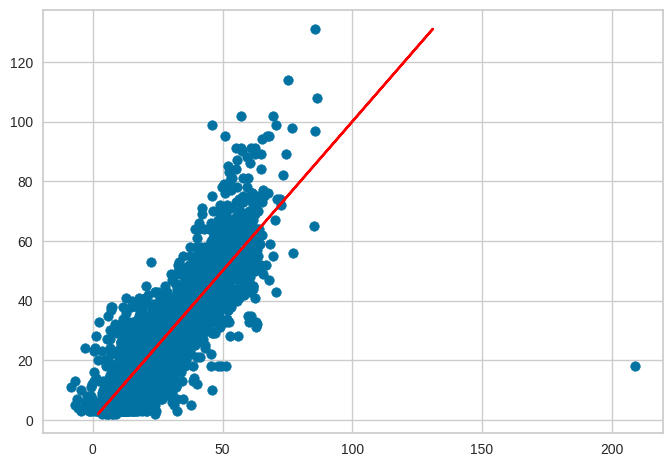

In [ ]:
plt.scatter(test_predictions,y_test)
plt.plot(y_test, y_test,color='red')

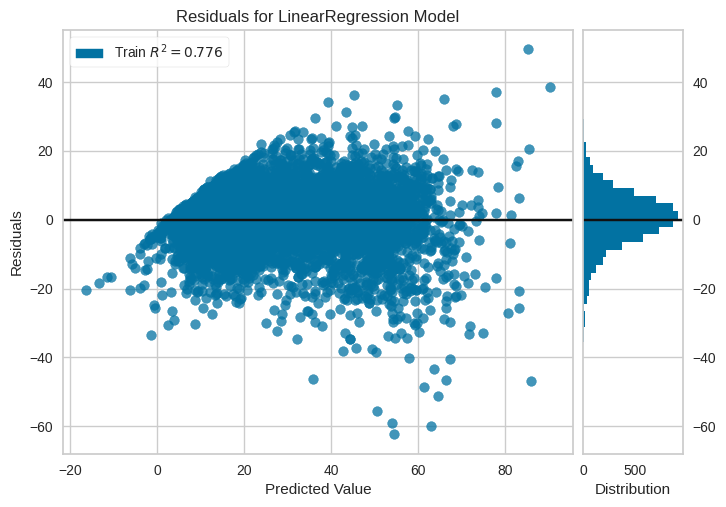

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer_residuals = ResidualsPlot(A)
visualizer_residuals.fit(final_poly_converter.fit_transform(X_train), y_train)
visualizer_residuals.show()


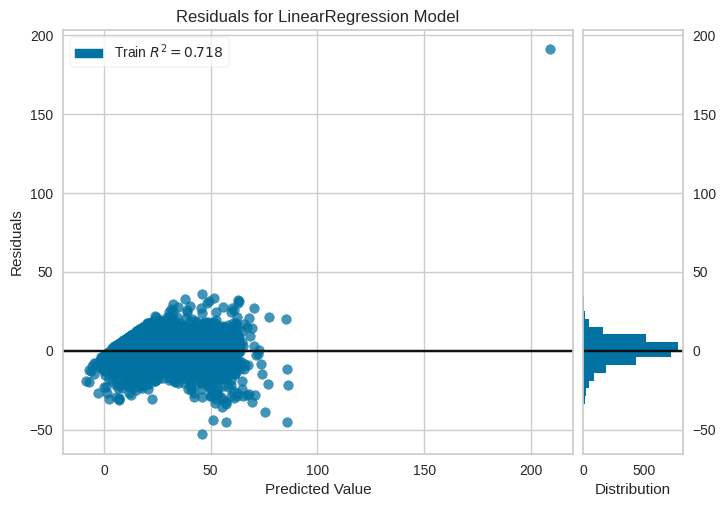

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer_residuals = ResidualsPlot(A)
visualizer_residuals.fit(final_poly_converter.fit_transform(X_test), y_test)
visualizer_residuals.show()

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
mask = yhat != -1
y_train2 = y_train[mask]
X_train2 = X_train
count = 0
for i in X_train.index:
  if mask[count] == False:
    X_train2=X_train2.drop(labels=i)
  count = count + 1



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
X_train2

,RH,SR,TOUT,WSR,HORA,MONTH
1926,13,0.0,31.03,15.4,11,3
7639,42,0.0,10.11,18.1,19,3
5004,43,0.0,29.57,20.0,22,8
8376,74,0.0,20.42,7.3,6,4
2865,51,0.0,33.36,8.1,12,5
...,...,...,...,...,...,...
7891,62,0.0,24.08,4.2,23,4
9225,41,0.0,31.69,7.8,13,5
4859,35,0.0,32.09,11.7,21,8
3264,62,0.0,26.09,5.3,8,5


In [ ]:
final_poly_converter = PolynomialFeatures(degree=4,include_bias=False)
final_model = LinearRegression()
A=final_model.fit(final_poly_converter.fit_transform(X_train2),y_train2)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_predictions = final_model.predict(final_poly_converter.fit_transform(X_train2))
MAE = mean_absolute_error(y_train2,test_predictions)
MSE = mean_squared_error(y_train2,test_predictions)
RMSE = np.sqrt(MSE)
r = r2_score(y_train2,test_predictions)

r

0.7806710625645915

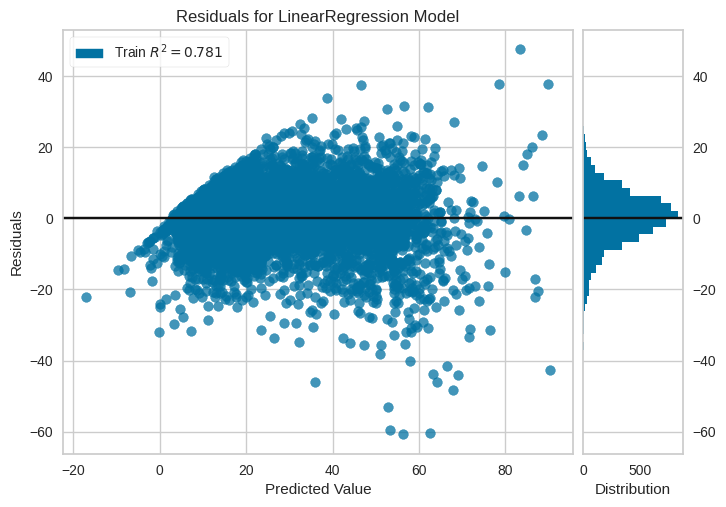

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer_residuals = ResidualsPlot(A)
visualizer_residuals.fit(final_poly_converter.fit_transform(X_train2), y_train2)
visualizer_residuals.show()